In [202]:
#Cleaning House 

import pandas as pd
import numpy as np

with open('lyrics.csv', 'r', encoding = 'utf8') as f:
    lyrics = f.readlines()

lyrics_df = pd.read_csv('lyrics.csv')
#dropping rows which do not have lyrics by first assigning nan to blank rows
lyrics_df['lyrics'] = lyrics_df['lyrics'].replace(' ', np.nan)
lyrics_df = lyrics_df.dropna(axis=0, subset=['lyrics'])

In [203]:
lyrics_df.head(357)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...,...
391,391,oh,2006,daliah-lavi,Not Available,Montag Dienstag Mittwoch\nDonnerstag Freitag S...
392,392,weisst-du,2006,daliah-lavi,Not Available,Weit du? Weit du\nwas du für mich bist?\nWeit ...
393,393,wer-hat-mein-lied-so-zerstrthrt,2006,daliah-lavi,Not Available,Wer hat mein Lied so zerstört\nMa\nWer hat mei...
404,404,hourglass,2004,borialis,Rock,"A lot of cats are hatin', slandering makin' ba..."


In [204]:

lyrics_df['lyrics'] = lyrics_df['lyrics'].str.replace('\n', ' ', regex=True)

In [205]:
#adpated from https://stackoverflow.com/questions/44476881/replacing-non-alphabet-characters-from-pandas-column
lyrics_df['lyrics'] = lyrics_df['lyrics'].str.replace('[^a-zA-Z]', ' ', regex=True)

In [206]:
#Observe changes using .head()

lyrics_df.head(65)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I m gonna cut...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn t hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I Verse If I wrote a...
4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it s po...
...,...,...,...,...,...,...
60,60,partition,2013,beyonce-knowles,Pop,Part Yonc Intro Let me hear you say ...
61,61,ghost,2013,beyonce-knowles,Pop,Intro Presenter The winner is Beyonce Knowl...
62,62,xo,2013,beyonce-knowles,Pop,Verse Your love is bright as ever Even in ...
63,63,single-ladies-put-a-ring-on-it,2013,beyonce-knowles,Pop,All the single ladies All the single ladies ...


In [207]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()


In [208]:
def token(text):
    return word_tokenize(text)

def lem(word):
    return lemmatizer.lemmatize(word)

#Source: https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells
#Worked in part with Erik Lovece
def lemmatize_text(text):
    text = [lem(w) for w in token(text)]
    text = ' '.join(text)
    return text

In [209]:
#This code takes quite a while to run to avoid re-running each time...
#lyrics_df['lyrics'] = lyrics_df.lyrics.apply(lemmatize_text)

In [210]:
#Convert updated data frame into a csv file.
lyrics_df.to_csv('clean_lyrics.csv', encoding = 'utf8', index = False)

In [214]:
#Reading clean_lyrics.csv file
with open('clean_lyrics.csv', 'r', encoding = 'utf8') as f:
    lyrics = f.readlines()

lyrics_df = pd.read_csv('clean_lyrics.csv')


In [ ]:
# Harvard IV-4 Cleaning

In [252]:
#Reading inquireraugmented excel file
#Source: https://www.geeksforgeeks.org/reading-excel-file-using-python/
import pandas as pd
#Insert complete path to excel file
path='C:\\Users\\15713\\Documents\\inquireraugmented.xls'
IA_df = pd.read_excel(path)


In [253]:
#Removing non-alphabetical characters from the columns 
IA_df['Positiv'] = IA_df['Positiv'].str.replace('[^a-zA-Z]', ' ', regex=True)
IA_df['Negativ'] = IA_df['Negativ'].str.replace('[^a-zA-Z]', ' ', regex=True)

In [582]:
#Filter for necessary columns "Entry," "Positiv," "Negativ"
IA_DF1 = IA_df[['Entry','Positiv','Negativ']].filter(regex ='Positiv')

In [297]:
IA_DF1

,Entry,Positiv,Negativ
0,NaN,NaN,NaN
1,A,NaN,NaN
2,ABANDON,NaN,Negativ
3,ABANDONMENT,NaN,Negativ
4,ABATE,NaN,Negativ
...,...,...,...
11784,ZENITH,Positiv,NaN
11785,ZERO,NaN,NaN
11786,ZEST,Positiv,NaN
11787,ZINC,NaN,NaN


In [298]:
#Filter for only "Positiv" in "Positiv" column and create a separate data frame. This will help improve processing time.
IA_pos = IA_DF1.loc[IA_DF1['Positiv'] == 'Positiv']


In [299]:
#Filter for "Negativ" from a smaller data frame to improve processing time when applying function on large dataset. 
IA_neg = IA_DF1.loc[IA_DF1['Negativ'] == 'Negativ']


In [300]:
IA_pos

,Entry,Positiv,Negativ
8,ABIDE,Positiv,NaN
9,ABILITY,Positiv,NaN
11,ABLE,Positiv,NaN
18,ABOUND,Positiv,NaN
41,ABSOLVE,Positiv,NaN
...,...,...,...
11703,WORTH-WHILE,Positiv,NaN
11704,WORTHINESS,Positiv,NaN
11706,WORTHY,Positiv,NaN
11784,ZENITH,Positiv,NaN


In [624]:
# insert the name of the column as a string in brackets to create positive and negative list. 
pos_list = list(IA_pos['Entry'][2:][(IA_pos['Positiv'].notnull())]) 
neg_list = list(IA_neg['Entry'][2:][(IA_neg['Negativ'].notnull())])

In [302]:
#Sentiment score function
#Worked in part with Erik Lovece
#Create sentiment score function
def sentiment_scorer(text_input, sentiment_list):
    text_words = text_input.upper().split() #.upper to match words in pos and neg list
    sentiment_score = 0.
    
    #For loop to count words 
    for word in text_words:
        if word in sentiment_list: sentiment_score += 1.
   #Count vectorization of positive and negative words  by counting presence positive and negative words in lyrics 
   #and dividing by total length of lyrics
    sentiment_score = sentiment_score / len(text_words)
    
    return sentiment_score

In [514]:
#Create an output list to find all genres in dataset.
genre_List = []
for genre in lyrics_df.genre:
    if genre not in genre_List: genre_List.append(genre)
    
genre_List

['Pop',
 'Hip-Hop',
 'Not Available',
 'Rock',
 'Metal',
 'Other',
 'Country',
 'Jazz',
 'Electronic',
 'Folk',
 'R&B',
 'Indie']

In [277]:
#Apply the positive and negative score function to the lyrics data frame.  
#lyrics_df['positive_sentiment'] = lyrics_df.lyrics.apply(pos_score)
#lyrics_df['negative_sentiment'] = lyrics_df.lyrics.apply(neg_score)


In [592]:
#Subset lyrics data frame based on genre
#Source: https://stackoverflow.com/questions/19237878/subsetting-a-python-dataframe
#Worked with Erik
Pop = lyrics_df[lyrics_df.genre == 'Pop']
HipHop = lyrics_df[lyrics_df.genre == 'Hip-Hop']
NA = lyrics_df[lyrics_df.genre == 'Not Available']
Rock = lyrics_df[lyrics_df.genre == 'Rock']
Metal = lyrics_df[lyrics_df.genre == 'Metal']
Other = lyrics_df[lyrics_df.genre == 'Other']
Country = lyrics_df[lyrics_df.genre == 'Country']
Jazz = lyrics_df[lyrics_df.genre == 'Jazz']
Electronic = lyrics_df[lyrics_df.genre == 'Electronic']
Folk = lyrics_df[lyrics_df.genre == 'Folk']
RB = lyrics_df[lyrics_df.genre == 'R&B']
Indie = lyrics_df[lyrics_df.genre == 'Indie']

In [224]:
#Apply pos and neg score to each subset of genre and create positive and negative sentiment column
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
#Indie.loc[:, 'negative_sentiment'] = 0.
#Indie.negative_sentiment = Indie.lyrics.apply(neg_score)
#Indie.loc[:, 'positive_sentiment'] = 0.
#Indie.positive_sentiment = Indie.lyrics.apply(pos_score)

#Pop.loc[:, 'negative_sentiment'] = 0.
#Pop.negative_sentiment = Pop.lyrics.apply(neg_score)
#Pop.loc[:, 'positive_sentiment'] = 0.
#Pop.positive_sentiment = Pop.lyrics.apply(pos_score)

#NA.loc[:, 'positive_sentiment'] = 0.
#NA.positive_sentiment = NA.lyrics.apply(pos_score)
#NA.loc[:, 'negative_sentiment'] = 0.
#NA.negative_sentiment = NA.lyrics.apply(neg_score)

#HipHop.loc[:, 'positive_sentiment'] = 0.
#NA.positive_sentiment = HipHop.lyrics.apply(pos_score)
#HipHop.loc[:, 'negative_sentiment'] = 0.
#NA.negative_sentiment = HipHop.lyrics.apply(neg_score)


#Rock.loc[:, 'negative_sentiment'] = 0.
#Rock.negative_sentiment = Rock.lyrics.apply(neg_score)
#Rock.loc[:, 'positive_sentiment'] = 0.
#Rock.positive_sentiment = Rock.lyrics.apply(pos_score)


#Metal.loc[:, 'negative_sentiment'] = 0.
#Metal.negative_sentiment = Metal.lyrics.apply(neg_score)
#Metal.loc[:, 'positive_sentiment'] = 0.
#Metal.positive_sentiment = Metal.lyrics.apply(pos_score)

#Other.loc[:, 'negative_sentiment'] = 0.
#Other.negative_sentiment = Other.lyrics.apply(neg_score)
#Other.loc[:, 'positive_sentiment'] = 0.
#Other.positive_sentiment = Other.lyrics.apply(pos_score)

#Country.loc[:, 'negative_sentiment'] = 0.
#Country.negative_sentiment = Country.lyrics.apply(neg_score)
#Country.loc[:, 'positive_sentiment'] = 0.
#Country.positive_sentiment = Country.lyrics.apply(pos_score)


#Jazz.loc[:, 'negative_sentiment'] = 0.
#Jazz.negative_sentiment = Jazz.lyrics.apply(neg_score)
#Jazz.loc[:, 'positive_sentiment'] = 0.
#Jazz.positive_sentiment = Jazz.lyrics.apply(pos_score)


#Electronic.loc[:, 'negative_sentiment'] = 0.
#Electronic.negative_sentiment = Electronic.lyrics.apply(neg_score)
#Electronic.loc[:, 'positive_sentiment'] = 0.
#Electronic.positive_sentiment = Electronic.lyrics.apply(pos_score)


#Folk.loc[:, 'negative_sentiment'] = 0.
#Folk.negative_sentiment = Folk.lyrics.apply(neg_score)
#Folk.loc[:, 'positive_sentiment'] = 0.
#Folk.positive_sentiment = Folk.lyrics.apply(pos_score)


#RB.loc[:, 'negative_sentiment'] = 0.
#RB.negative_sentiment = RB.lyrics.apply(neg_score)
#RB.loc[:, 'positive_sentiment'] = 0.
#RB.positive_sentiment = RB.lyrics.apply(pos_score)

In [ ]:
#Create score column on each data frame that takes the sum of positive and negative score
#sum = Indie["score"] =  Indie.positive_sentiment + Indie.negative_sentiment
#sum = Pop["score"] = Pop.positive_sentiment + Pop.positive_sentiment
#sum = NA["score"] = NA.positive_sentiment + NA.positive_sentiment
#sum = HipHop["score"] = HipHop.positive_sentiment + HipHop.positive_sentiment
#sum = Rock["score"] = Rock.positive_sentiment + Rock.positive_sentiment
#sum = Other["score"] = Other.positive_sentiment + Other.positive_sentiment
#sum = Country["score"] = Country.positive_sentiment + Country.positive_sentiment
#sum = Jazz["score"] = Jazz.positive_sentiment + Jazz.positive_sentiment 
#sum = Electronic["score"] = Electronic.positive_sentiment + Electronic.positive_sentiment
#sum = Folk["score"] = Folk.positive_sentiment + Folk.positive_sentiment
#sum = RB["score"] = RB.positive_sentiment + RB.positive_sentiment

In [590]:
#To avoid re-running code save all changes made to the data frames by converting to csv file. 
Indie.to_csv('Indie.csv', encoding = 'utf8', index = False)
Pop.to_csv('Pop.csv', encoding = 'utf8', index = False)
NA.to_csv('NA.csv', encoding = 'utf8', index = False)
HipHop.to_csv('HipHop.csv', encoding = 'utf8', index = False)
Rock.to_csv('Rock.csv', encoding = 'utf8', index = False)
Other.to_csv('Other.csv', encoding = 'utf8', index = False)
Country.to_csv('Country.csv', encoding = 'utf8', index = False)
Jazz.to_csv('Jazz.csv', encoding = 'utf8', index = False)
Electronic.to_csv('Electronic.csv', encoding = 'utf8', index = False)
Folk.to_csv('Folk.csv', encoding = 'utf8', index = False)
RB.to_csv('RB.csv', encoding = 'utf8', index = False)

In [495]:
#Concatenate all genres into one data frame
pdAgg = pd.concat([Indie, Pop, HipHop, Rock, Other, Country, Jazz, Electronic, Folk, RB ]).reset_index(drop=True)

In [496]:
pdAgg

,index,song,year,artist,genre,lyrics,negative_sentiment,positive_sentiment,score
0,1643.0,losing-you,2014.0,dead-ceremony,Indie,Don t feel so bad It s just the way the wheel ...,0.009174,0.000000,0.009174
1,1988.0,wild-dreams,2014.0,desert-noises,Indie,Place outside where I pas to waste my time In ...,0.032086,0.010695,0.042781
2,1989.0,run-through-the-woods,2014.0,desert-noises,Indie,Fixin to run through the wood Leaving cause I ...,0.006289,0.006289,0.012579
3,1991.0,angels,2014.0,desert-noises,Indie,Play Twenty seven way To get outta town today ...,0.022989,0.022989,0.045977
4,1992.0,keys-on-the-table,2014.0,desert-noises,Indie,Left the key on the table Cause I know I could...,0.018349,0.004587,0.022936
...,...,...,...,...,...,...,...,...,...
218853,361034.0,you-re-the-one,2016.0,death-threat,R&B,I wish I wish that I had known I would ve neve...,0.013043,0.000000,0.000000
218854,361204.0,my-only,2016.0,goodnight-nurse,R&B,What happened to you and me One moment changed...,0.017241,0.057471,0.114943
218855,361209.0,this-is-it,2016.0,goodnight-nurse,R&B,Let s take it all away Replace it with everyth...,0.000000,0.000000,0.000000
218856,361211.0,details,2016.0,goodnight-nurse,R&B,I m consumed by the idol of you In my head i w...,0.015873,0.003968,0.007937


In [626]:
#Create output list to see years in lyrics_df
year_List = []
for year in lyrics_df.year:
    if year not in year_List: 
        year_List.append(year)
    
year_List

[2009,
 2007,
 2013,
 2010,
 2012,
 2006,
 2016,
 2011,
 2015,
 2008,
 2014,
 1998,
 2002,
 1995,
 2004,
 1972,
 2005,
 1978,
 1970,
 1981,
 1994,
 1997,
 1993,
 1982,
 1983,
 1986,
 1992,
 1977,
 1989,
 1979,
 1996,
 2001,
 1990,
 1987,
 2003,
 1975,
 1973,
 1991,
 1999,
 1974,
 2000,
 1980,
 1984,
 1976,
 702,
 1971,
 1985,
 1988,
 112,
 1968,
 67]

In [497]:
#Group by genre and year and comput mean score.
pdfinal = pdAgg.groupby(['genre','year'])['score'].mean().to_frame('score').reset_index()

In [498]:
#Clean 'year' column
pdfinal['year'] = pdfinal['year'].astype(str).replace('\.0', '', regex=True)

In [503]:
pdtest = pdfinal.copy()

In [504]:
#Create yearList to increase years by increment of 5. 
yearList = ["1968","1969","1970"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1970"

yearList = ["1971","1972","1973","1974","1975"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1975"

yearList = ["1976","1977","1978","1979","1980"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1980"

yearList = ["1981","1982","1983","1984","1985"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1985"

yearList = ["1986","1987","1988","1989","1990"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1990"

yearList = ["1991","1992","1993","1994","1995"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "1995"

yearList = ["1996","1997","1998","1999","2000"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "2000"

yearList = ["2001","2002","2003","2004","2005"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "2005"


yearList = ["2006","2007","2008","2009","2010"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "2010"

yearList = ["2011","2012","2013","2014","2015"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "2015"

yearList = ["2016","2017","2018","2019","2020"]
pdtest.loc[pdtest.year.isin(yearList) == True, 'year']= "2020"


In [613]:
#Group by 'genre' and 'year' to compute mean score for plot of year by score for each genre 
pdAgg = pdtest.groupby(['genre','year'])['score'].mean().to_frame('score').reset_index()

In [614]:
pdAgg

,genre,year,score
0,Country,1970,0.058415
1,Country,1975,0.043673
2,Country,1980,0.046084
3,Country,1985,0.019968
4,Country,1990,0.026797
...,...,...,...
94,Rock,2000,0.024412
95,Rock,2005,0.026638
96,Rock,2010,0.024120
97,Rock,2015,0.023283


In [615]:
pdfinal = pdAgg.copy()


In [556]:
#Group by 'year' to compute mean score for plot of year by score regarless of genre
#http://www.datasciencemadesimple.com/group-dataframe-python-pandas-group-function-pandas/
pdfinal1 = pdAgg.groupby(['year'])['score'].mean().to_frame('score').reset_index()

In [617]:
#Remove unwanted values from 'year' column
pdfinal1 = pdfinal1[pdfinal1.year != '112']
pdfinal1 = pdfinal1[pdfinal1.year != '67']
pdfinal1 = pdfinal1[pdfinal1.year != '702']

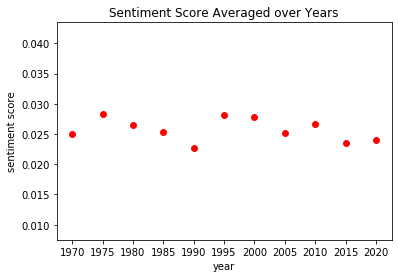

In [620]:
#Create year by score plot regardless of genre
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(pdfinal1.year, pdfinal1.score, s = 35, c = "red")
 
plt.xlabel('year')
plt.ylabel('sentiment score')
plt.title('Sentiment Score Averaged over Years')
plt.show()


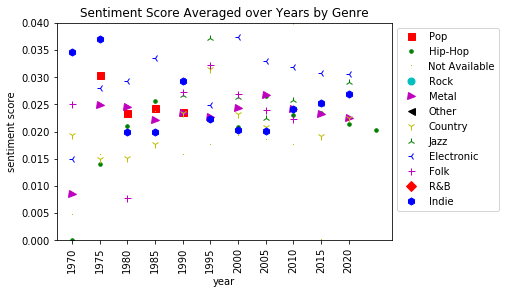

<Figure size 720x720 with 0 Axes>

In [627]:

import matplotlib.pyplot as plt
#Source: https://matplotlib.org/
   
#Create the plot function using years and genre list
years = [ "1970","1975","1980","1985", "1990", "1995", "2000", "2005", "2010", "2015", "2020"]
genre = ['Pop','Hip-Hop','Not Available','Rock','Metal','Other','Country','Jazz','Electronic','Folk', 'R&B', 'Indie']        


#Create the dictionay representing years and genre
ydict = {"1970":0, "1975":1,  "1980":2, "1985":3, "1990":4, "1995":5, "2000":6, "2005":7, "2010":8, "2015":9, "2020":10}
gdict = {'Pop':0, 'Hip-Hop':1, 'Not Available':2,'Rock':3, 'Metal':4, 'Other':5, 'Country':6, 'Jazz':7,'Electronic':8,'Folk':9, 'R&B':10, 'Indie': 11}

#Creating a list of genre by score for from data frame
IndieList = pdfinal[['score']][pdfinal.genre=="Indie"].values
PopList = pdfinal[['score']][pdfinal.genre=="Pop"].values
HipHopList = pdfinal[['score']][pdfinal.genre=="Hip-Hop"].values
NAList = pdfinal[['score']][pdfinal.genre=="Not Available"].values
RockList = pdfinal[['score']][pdfinal.genre=="Rock"].values
MetalList = pdfinal[['score']][pdfinal.genre=="Metal"].values
OtherList = pdfinal[['score']][pdfinal.genre=="Other"].values
CountryList = pdfinal[['score']][pdfinal.genre=="Country"].values
JazzList = pdfinal[['score']][pdfinal.genre=="Jazz"].values
ElectronicList = pdfinal[['score']][pdfinal.genre=="Electronic"].values
FolkList = pdfinal[['score']][pdfinal.genre=="Folk"].values
RBList = pdfinal[['score']][pdfinal.genre=="R&B"].values

#Creating Matrix of lists
testdata = np.array([IndieList, PopList, HipHopList, NAList, RockList, MetalList, OtherList, CountryList, JazzList, ElectronicList, FolkList, RBList])

def myPlot (data,genre_List):
   #Define color and marker shape
    Col = {"Indie": "b","Pop": "r","Hip-Hop": "g", "Not Available": "y", "Rock": "c", "Metal": "m", "Other": "k", "Country": "y", "Jazz": "g", 
           "Electronic": "b", "Folk": "m", "R&B": "r"}
    Mrk = {"Indie": "h","Pop": "s","Hip-Hop": ".", "Not Available": ",", "Rock": "o", "Metal": ">", "Other": "<", "Country": "1", "Jazz": "2", 
           "Electronic": "3", "Folk": "+", "R&B": "D"}
    #Creating plot
    for genre in genre_List:
        plt.plot(data[gdict[genre]],c=Col[genre],ls='',marker=Mrk[genre],ms='7',label=genre),
        plt.legend(loc='upper left',bbox_to_anchor=(1,1)),
        plt.xticks(list(range(0,11)),years,rotation='vertical'),
        plt.ylim(0,.04),
    #Lable plot
    plt.xlabel('year')
    plt.ylabel('sentiment score')
    plt.title('Sentiment Score Averaged over Years by Genre')
    plt.figure(figsize=(10,10))
    plt.show()
    
   
myPlot(testdata,genre_List)


In [ ]:
#Created output plot